In [1]:
### Loading the dataset
import pandas as pd
df_vid = pd.read_csv('youtube_videos (1).csv',index_col=[0])
df_vid.head()

,id,channel,publishedAt,title,description,views,likes,dislikes
0,TLzrm_KwTow,Sky News Australia,2023-06-26 01:31:54+00:00,Commonwealth Bank experiences outage with app,The Commonwealth Bank is experiencing a major ...,2656,20,0
1,gVKfOoZAIjw,7NEWS Australia,2023-07-13 08:36:19+00:00,Commonwealth Bank workers in bitter standoff o...,A legal showdown is looming over a big bank's ...,11475,58,0
2,vn1-FWAxqAk,9 News Australia,2023-08-09 08:26:28+00:00,Commonwealth Bank record biggest annual profit...,*Subscribe and 🔔: http://9Soci.al/KM6e50GjSK9*...,10775,63,0
3,8CAB3f-P7C0,9 News Australia,2023-06-26 08:22:19+00:00,Major Commonwealth bank outage left customers ...,Customers at Australia's biggest bank have bee...,19612,118,0
4,hACKujXkyhU,ABC News (Australia),2023-06-26 11:09:45+00:00,Commonwealth Bank outage leaves customers unab...,The Commonwealth Bank has apologised to its cu...,6143,33,0


Now we need to create visualizations in order to better understand the data

### Data preparation

In [2]:
##Taking a look at the dataset
df_vid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           19 non-null     object
 1   channel      19 non-null     object
 2   publishedAt  19 non-null     object
 3   title        19 non-null     object
 4   description  19 non-null     object
 5   views        19 non-null     int64 
 6   likes        19 non-null     int64 
 7   dislikes     19 non-null     int64 
dtypes: int64(3), object(5)
memory usage: 1.3+ KB


In [3]:
## Taking a look at the data in the dislikes column
df_vid['dislikes'].value_counts()

0    19
Name: dislikes, dtype: int64

The 'dislikes' column consists of only zeros..it will be of no use in this analysis

In [4]:
## Checking for missing values 
df_vid.isna().sum()

id             0
channel        0
publishedAt    0
title          0
description    0
views          0
likes          0
dislikes       0
dtype: int64

In [5]:
# checking for duplicates...we will use the id and publishedAt columns as the subset 
df_vid.duplicated(subset=['id','publishedAt']).sum()

0

In [6]:
## Changing the pulbshedAt column to a datetime object
df_vid['publishedAt'] = pd.to_datetime(df_vid['publishedAt'])
df_vid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   id           19 non-null     object             
 1   channel      19 non-null     object             
 2   publishedAt  19 non-null     datetime64[ns, UTC]
 3   title        19 non-null     object             
 4   description  19 non-null     object             
 5   views        19 non-null     int64              
 6   likes        19 non-null     int64              
 7   dislikes     19 non-null     int64              
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 1.3+ KB


### Data visualization

### Channels and their number of  views

In [7]:
### Grouping the dataset by channels
df_channels = df_vid.groupby('channel')[['views','likes']].sum()
df_channels.reset_index(inplace=True)
# sorting the values by views
df_channels_views = df_channels.sort_values(by=['views'],ascending=False)

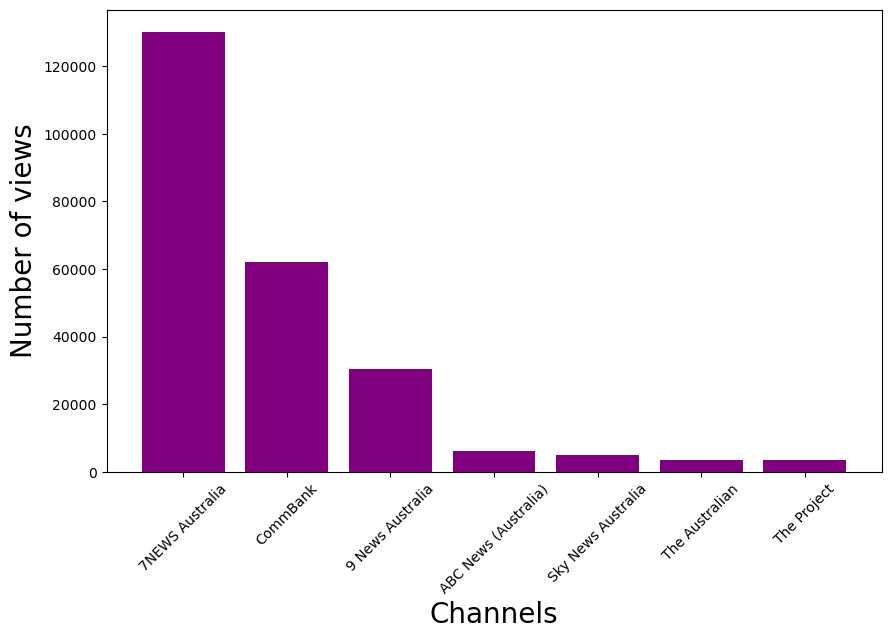

In [8]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,6))
ax.bar(df_channels_views['channel'],df_channels_views['views'],color='purple')
ax.set_xlabel('Channels',fontsize=20)
ax.set_ylabel('Number of views',fontsize=20)
ax.set_xticks(range(len(df_channels_views)))
ax.set_xticklabels(df_channels_views['channel'],rotation=45)
plt.show();

The 7NEWS Australia has the most views compared to the rest of the channels

### Channels and their number of likes 

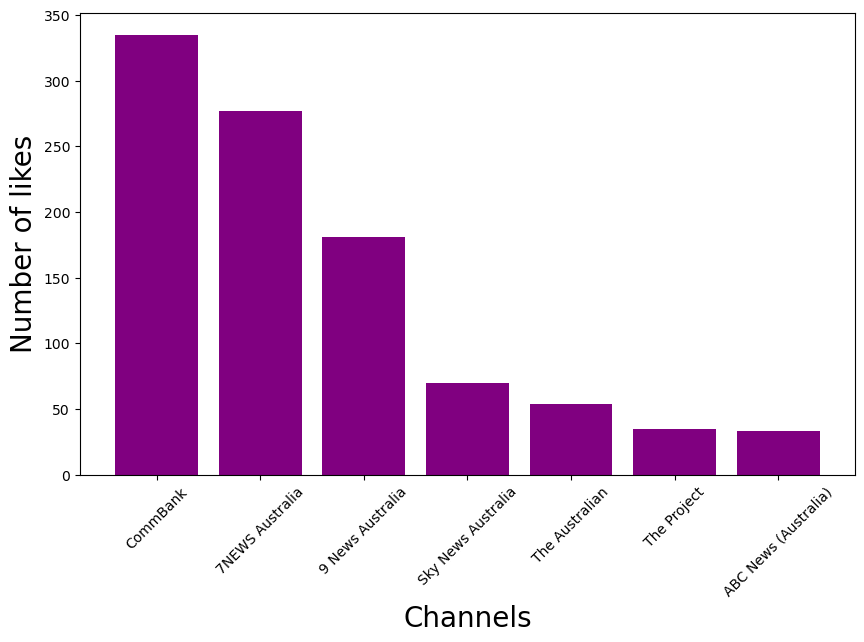

In [9]:
### Sorting the channels by likes
df_channels_likes = df_channels.sort_values(by='likes',ascending=False)
fig,ax = plt.subplots(figsize=(10,6))
ax.bar(df_channels_likes['channel'],df_channels_likes['likes'],color='purple')
ax.set_xlabel('Channels',fontsize=20)
ax.set_ylabel('Number of likes',fontsize=20)
ax.set_xticks(range(len(df_channels_likes)))
ax.set_xticklabels(df_channels_likes['channel'],rotation=45)
plt.show();

The CommBank channel has the most likes followed up closely by 7NEWS Australia

Next we want to create a time series dataframe that can help us come with visualizations for the number of views depending on the time of the day

In [10]:
## Creating a new dataframe
df_ts = df_vid[['publishedAt','views']]
## Creating a new column containing the day of the week
df_ts['Day_of_week'] = df_ts['publishedAt'].dt.strftime('%A')
df_ts

C:\Users\hp\AppData\Local\Temp\ipykernel_5036\715982383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ts['Day_of_week'] = df_ts['publishedAt'].dt.strftime('%A')


,publishedAt,views,Day_of_week
0,2023-06-26 01:31:54+00:00,2656,Monday
1,2023-07-13 08:36:19+00:00,11475,Thursday
2,2023-08-09 08:26:28+00:00,10775,Wednesday
3,2023-06-26 08:22:19+00:00,19612,Monday
4,2023-06-26 11:09:45+00:00,6143,Monday
5,2023-08-10 00:12:06+00:00,35431,Thursday
6,2023-06-26 10:09:27+00:00,8501,Monday
7,2023-08-09 02:28:12+00:00,2134,Wednesday
8,2023-06-26 11:19:37+00:00,1715,Monday
9,2023-08-08 22:48:39+00:00,518,Tuesday


In [11]:
## Grouping by days of the week
df_ts_grouped = df_ts.groupby('Day_of_week')[['Day_of_week','views']].sum()
df_ts_grouped = df_ts_grouped.sort_values(by='views',ascending=False)
df_ts_grouped.reset_index(inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_5036\3273990491.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts_grouped = df_ts.groupby('Day_of_week')[['Day_of_week','views']].sum()


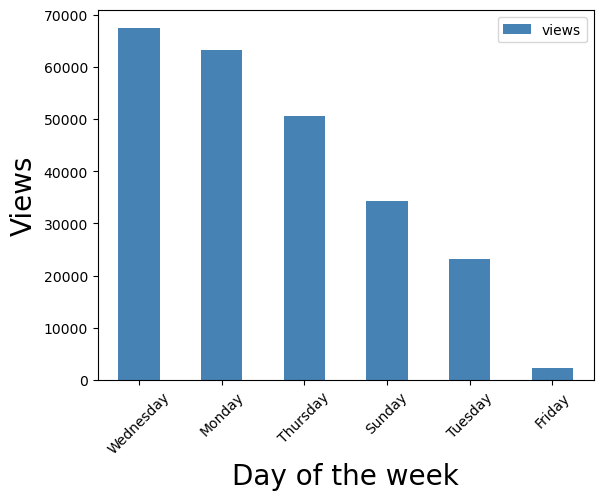

In [12]:
## Plotting the days and their views
df_ts_grouped.plot(x='Day_of_week',y='views',kind='bar',color='steelblue',rot=45)
plt.xlabel('Day of the week',fontsize=20)
plt.ylabel('Views',fontsize=20)
plt.show();

- Wednesday has the most views followed up closely by Monday
- Friday has the least views which are really low compared to the rest of the days.

In [13]:
### Creating a new dataframe
df_ts_2 = df_vid[['publishedAt','views']]
df_ts_2.set_index('publishedAt',inplace=True)

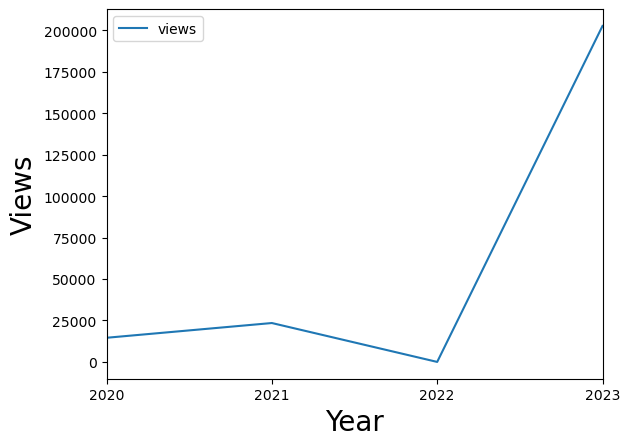

In [14]:
## Downsampling the dataset to years
df_resampled = df_ts_2.resample('Y').sum()
## Filling in the missing values and plotting the time series
df_resampled.ffill().plot();
plt.xlabel('Year',fontsize=20)
plt.ylabel('Views',fontsize=20)
plt.show()